In [137]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

In [138]:
# Get the pygame library
import pygame
pygame.mixer.init()

In [139]:
pygame.mixer.music.load('such_good_fun.wav')
pygame.mixer.music.play()

In [3]:
import scipy.io.wavfile as wf

In [4]:
sample_rate, data = wf.read('such_good_fun.wav')

In [5]:
sample_rate

44100

In [6]:
data

array([[  20, -110],
       [  13, -109],
       [  -8, -106],
       ..., 
       [ -76,   40],
       [ -88,   48],
       [ -73,   31]], dtype=int16)

<IPython.core.display.Javascript object>


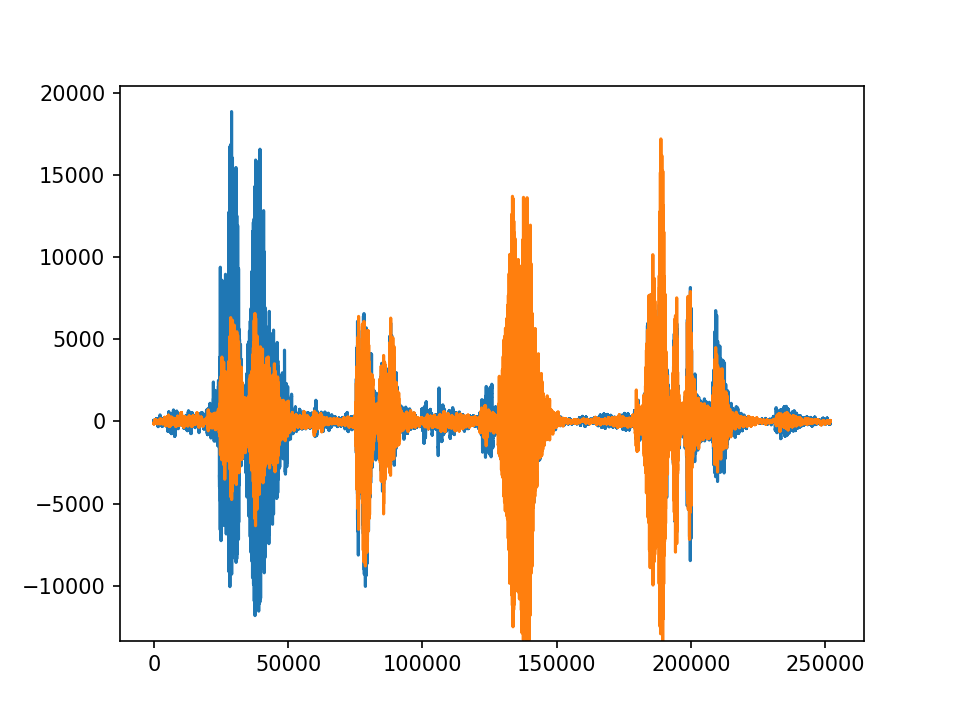

In [9]:
plt.plot(data[:, 0])

<IPython.core.display.Javascript object>


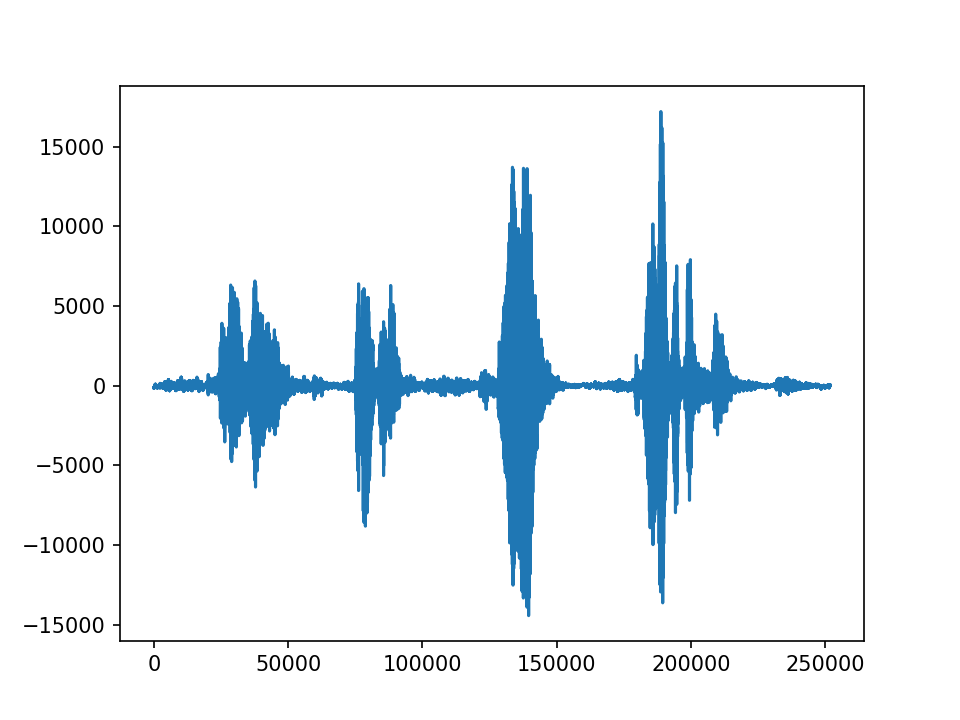

In [11]:
plt.plot(data[:, 1])

In [12]:
all_max = data.max()
all_max

18874

In [13]:
quiet_data = data / 20

<IPython.core.display.Javascript object>


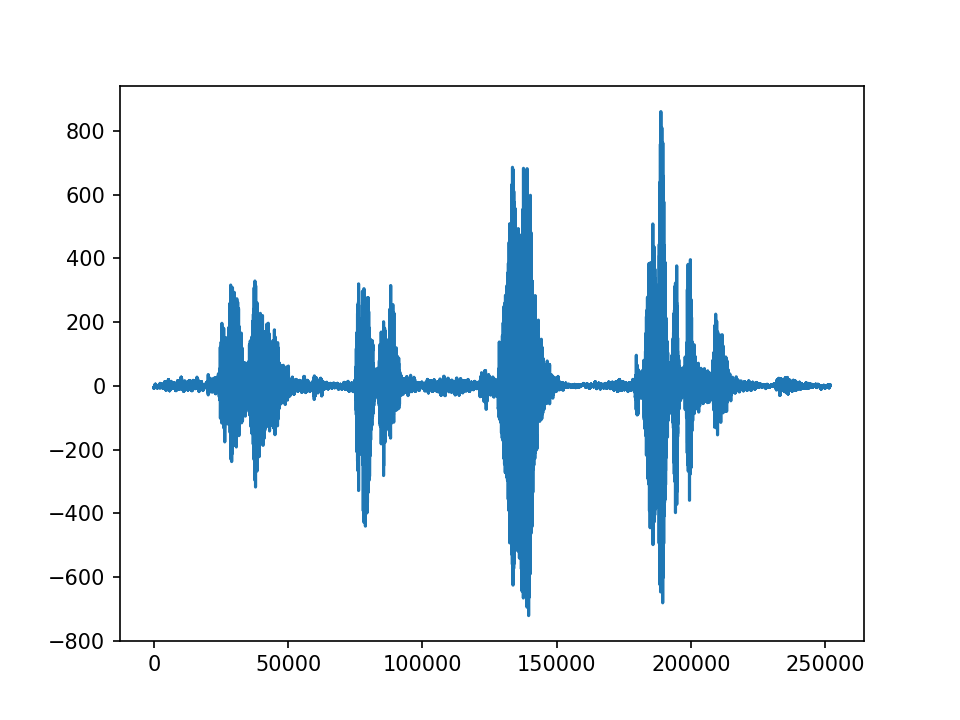

In [14]:
plt.plot(quiet_data[:, 1])

In [15]:
wf.write('quieter.wav', sample_rate, quiet_data.astype('int16'))

In [16]:
pygame.mixer.music.load('such_good_fun.wav')
pygame.mixer.music.play()

In [17]:
pygame.mixer.music.load('quieter.wav')
pygame.mixer.music.play()

In [141]:
def write_and_play(sound_data):
    wf.write('wav_file.wav', 44100, sound_data.astype('int16'))
    pygame.mixer.music.load('wav_file.wav')
    pygame.mixer.music.play()

In [57]:
data.shape

(251904, 2)

In [58]:
n_samples, n_channels = data.shape
n_samples

251904

In [59]:
n_channels

2

In [53]:
thresholded_data = data.copy
thresh = 500
for sample_index in range(n_samples):
    for channel_index in range(n_channels):
        sample = data[sample_index, channel_index]
        if sample > -thresh:
            sample = 5000
        elif sample < -thresh:
            sample = -5000
        else:
            sample = 0
        _data[sample_no, channel_no] = sample

<IPython.core.display.Javascript object>


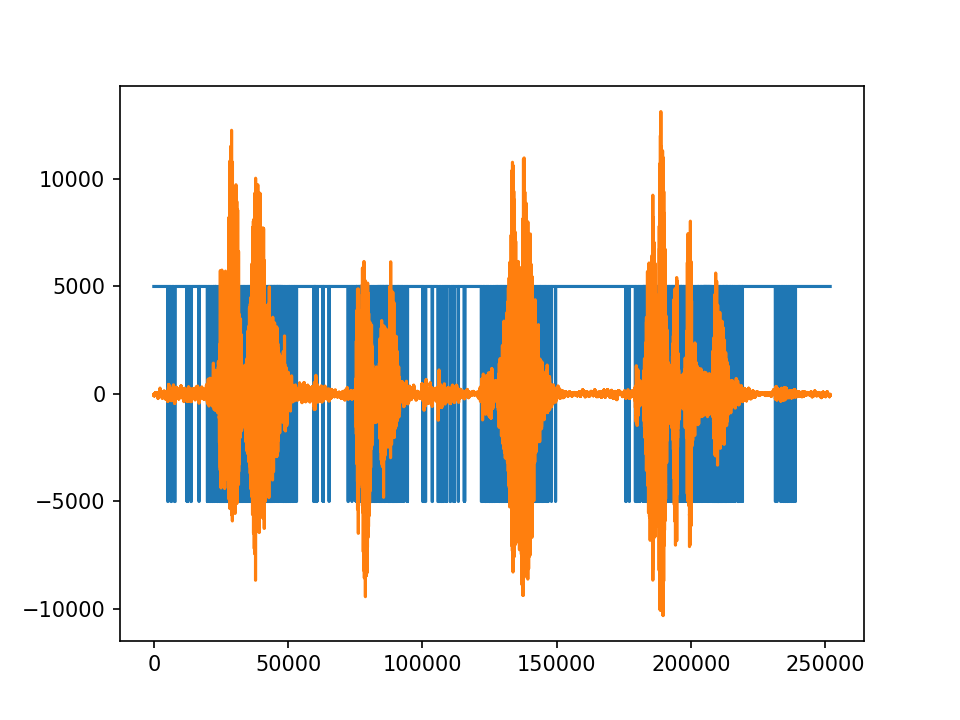

In [54]:
plt.plot(positive_data[:, 0])

In [142]:
write_and_play(positive_data)

In [56]:
pygame.mixer.music.load('positive.wav')
pygame.mixer.music.play()

In [60]:
mono_data = data.mean(axis=1)

In [61]:
wf.write('mono.wav', sample_rate, mono_data.astype('int16'))

In [62]:
pygame.mixer.music.load('mono.wav')
pygame.mixer.music.play()

In [63]:
sr, data = wf.read('mono.wav')
sr, data

(44100, array([-45, -48, -57, ..., -18, -20, -21], dtype=int16))

In [64]:
n_samples = len(data)
n_samples

251904

In [65]:
n_samples / sr

5.712108843537415

<IPython.core.display.Javascript object>


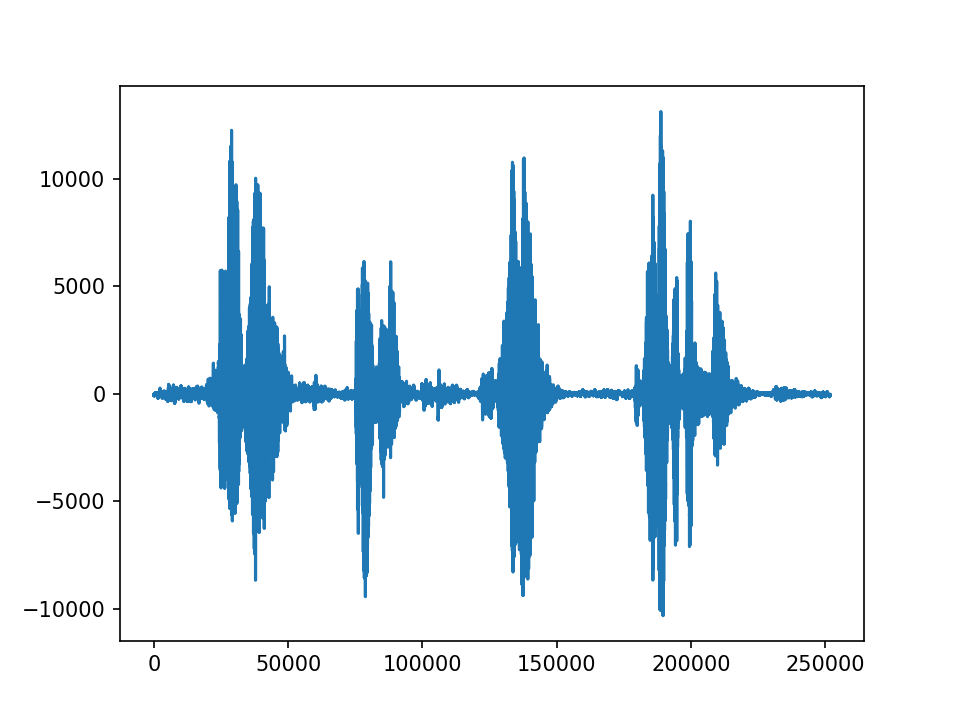

In [67]:
plt.plot(data)

In [117]:
import numpy as np
two_seconds = np.arange(sr * 2) / sr
two_seconds

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         1.99993197e+00,   1.99995465e+00,   1.99997732e+00])

In [134]:
# Frequency
# A4 is 440 Hz : http://pages.mtu.edu/~suits/notefreqs.html
frequency = 440

In [135]:
sine_wave = np.sin(two_seconds * 2 * np.pi * frequency) * 5000
wf.write('sine_wave.wav', sample_rate, sine_wave.astype('int16'))
pygame.mixer.music.load('sine_wave.wav')
pygame.mixer.music.play()

<IPython.core.display.Javascript object>


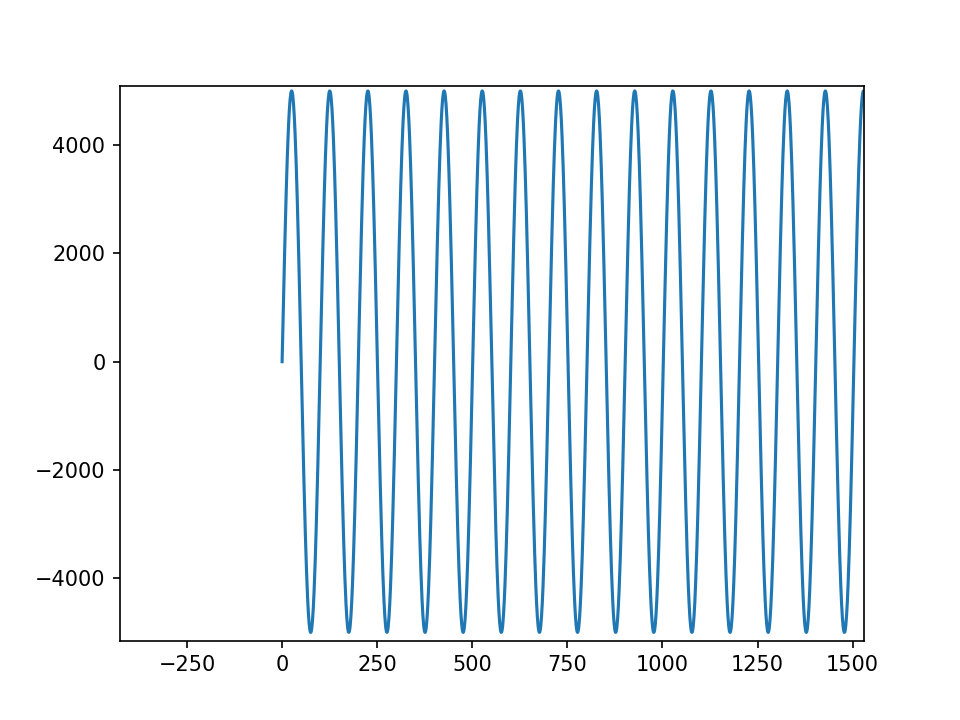

In [136]:
plt.plot(sine_wave)